In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation

In [2]:
def heun(p0: np.array, N: int, t: float) -> np.array:
    """Calculatue heuns method for the three body problem for N steps with step size t.

    Args:
        p0 (np.array): 12 dimensional vector of initial conditions corresponding to the following:
            p0[0] = x1, p0[1] = x2, p0[2] = x3, p0[3] = y1, p0[4] = y2, p0[5] = y3, 
            p0[6] = vx1, p0[7] = vx2, p0[8] = vx3, p0[9] = vy1, p0[10] = vy2, p0[11] = vy3
        N (int): number of steps
        t (float): step size

    Returns:
        np.array: np.array positions and velocities for each x and y of each planet
    """
    data = [p0[0], p0[1], p0[2], p0[3], p0[4], p0[5], 
            p0[6], p0[7], p0[8], p0[9], p0[10], p0[11], 
            derivative(p0)[6], derivative(p0)[7], derivative(p0)[8], 
            derivative(p0)[9], derivative(p0)[10], derivative(p0)[11]]
    df = pd.DataFrame(data=[data], columns=['P1: X Position', 'P2: X Position', 
                                'P3: X Position', 'P1: Y Position', 'P2: Y Position', 
                                'P3: Y Position', 'P1: X Velocity', 'P2: X Velocity', 
                                'P3: X Velocity', 'P1: Y Velocity', 'P2: Y Velocity', 
                                'P3: Y Velocity', 'P1: X Acceleration', 'P2: X Acceleration', 
                                'P3: X Acceleration', 'P1: Y Acceleration', 'P2: Y Acceleration', 
                                'P3: Y Acceleration'])
    
    # TODO: verify times and step sizes are correct
    G = 6.67430 * (10**(-11))
    for i in range(0, N):
        ptemp = p0 + t * derivative(p0)
        dp0 = derivative(p0)
        dptemp = derivative(ptemp)
        p0 = p0 + t/2 * (dp0 + dptemp)
        data = [p0[0], p0[1], p0[2], p0[3], p0[4], p0[5], p0[6], p0[7], p0[8], p0[9], p0[10], p0[11], 
            derivative(p0)[6], derivative(p0)[7], derivative(p0)[8], derivative(p0)[9], derivative(p0)[10], 
            derivative(p0)[11]]
        df2 = pd.DataFrame(data=[data], columns=['P1: X Position', 'P2: X Position', 
                                'P3: X Position', 'P1: Y Position', 'P2: Y Position', 
                                'P3: Y Position', 'P1: X Velocity', 'P2: X Velocity', 
                                'P3: X Velocity', 'P1: Y Velocity', 'P2: Y Velocity', 
                                'P3: Y Velocity', 'P1: X Acceleration', 'P2: X Acceleration', 
                                'P3: X Acceleration', 'P1: Y Acceleration', 'P2: Y Acceleration', 
                                'P3: Y Acceleration'])
        df2['P1: X Position'] = p0[0]
        df2['P2: X Position'] = p0[1]
        df2['P3: X Position'] = p0[2]
        df2['P1: Y Position'] = p0[3]
        df2['P2: Y Position'] = p0[4]
        df2['P3: Y Position'] = p0[5]
        df2['P1: X Velocity'] = p0[6]
        df2['P2: X Velocity'] = p0[7]
        df2['P3: X Velocity'] = p0[8]
        df2['P1: Y Velocity'] = p0[9]
        df2['P2: Y Velocity'] = p0[10]
        df2['P3: Y Velocity'] = p0[11]
        df = pd.concat([df, df2], ignore_index=True)
    
    df.insert(0, 'Time', [i * t for i in range(0, N + 1)])
    return df


def derivative(p0: np.array):
    G = 6.67430 * (10 ** (-11))
    p1 = 0 * p0
    p1[0] = p0[6]
    p1[1] = p0[7]
    p1[2] = p0[8]
    p1[3] = p0[9]
    p1[4] = p0[10]
    p1[5] = p0[11]
    p1[6] = - G * ((p0[0] - p0[1])/((p0[0]-p0[1])**2+(p0[3]-p0[4])**2)**(3/2)) - G * ((p0[0] - p0[2])/((p0[0]-p0[2])**2+(p0[3]-p0[5])**2)**(3/2))
    p1[7] = - G * ((p0[1] - p0[0])/((p0[1]-p0[0])**2+(p0[4]-p0[3])**2)**(3/2)) - G * ((p0[1] - p0[2])/((p0[1]-p0[2])**2+(p0[4]-p0[5])**2)**(3/2))
    p1[8] = - G * ((p0[2] - p0[0])/((p0[2]-p0[0])**2+(p0[5]-p0[3])**2)**(3/2)) - G * ((p0[2] - p0[1])/((p0[2]-p0[1])**2+(p0[5]-p0[4])**2)**(3/2))
    p1[9] = - G * ((p0[3] - p0[4])/((p0[0]-p0[1])**2+(p0[3]-p0[4])**2)**(3/2)) - G * ((p0[3] - p0[5])/((p0[0]-p0[2])**2+(p0[3]-p0[5])**2)**(3/2))
    p1[10] = - G * ((p0[4] - p0[3])/((p0[1]-p0[0])**2+(p0[4]-p0[3])**2)**(3/2)) - G * ((p0[4] - p0[5])/((p0[1]-p0[2])**2+(p0[4]-p0[5])**2)**(3/2))
    p1[11] = - G * ((p0[5] - p0[3])/((p0[2]-p0[0])**2+(p0[5]-p0[3])**2)**(3/2)) - G * ((p0[5] - p0[4])/((p0[2]-p0[1])**2+(p0[5]-p0[4])**2)**(3/2))
    return p1


In [ ]:
p = np.array([-1, 1, 0, 0, 0, 0, 0.347113, 0.347113, -0.694226, 0.532727, 0.532727, -1.065454])
d = heun(p, 3000, 0.001)

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("y vs x")
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', marker='x', label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', marker='x',label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', marker='x', label='Venus')
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', alpha=0.3, label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', alpha=0.3, label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', alpha=0.3, label='Venus')
ax.legend()
plt.show()

In [ ]:
p = np.array([-1, 1, 0, 0, 0, 0, 0.306893, 0.306893, -0.613786, 0.125507, 0.125507, -0.251014])
d = heun(p, 1000, 0.001)
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("y vs x")
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', marker='x', label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', marker='x',label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', marker='x', label='Venus')
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', alpha=0.3, label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', alpha=0.3, label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', alpha=0.3, label='Venus')
ax.legend()
plt.show()

In [ ]:
p = np.array([-0.9892620043, 2.2096177241, 1.2203557197, 0, 0, 0, 0, 0, 0, 1.9169244185, 0.1910268738, 2.1079512924])
d = heun(p, 50000, 0.001)
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("y vs x")
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', marker='x', label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', marker='x',label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', marker='x', label='Venus')
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', alpha=0.3, label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', alpha=0.3, label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', alpha=0.3, label='Venus')
ax.legend()
plt.show()

In [ ]:
p = np.array([-1, 1, 0, 0, 0, 0, 0.080584, 0.080584, -0.161168, 0.532727, 0.532727, -1.065454])
d = heun(p, 10000, 0.001)
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("y vs x")
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', marker='x', label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', marker='x',label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', marker='x', label='Venus')
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', alpha=0.3, label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', alpha=0.3, label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', alpha=0.3, label='Venus')
ax.legend()
plt.show()

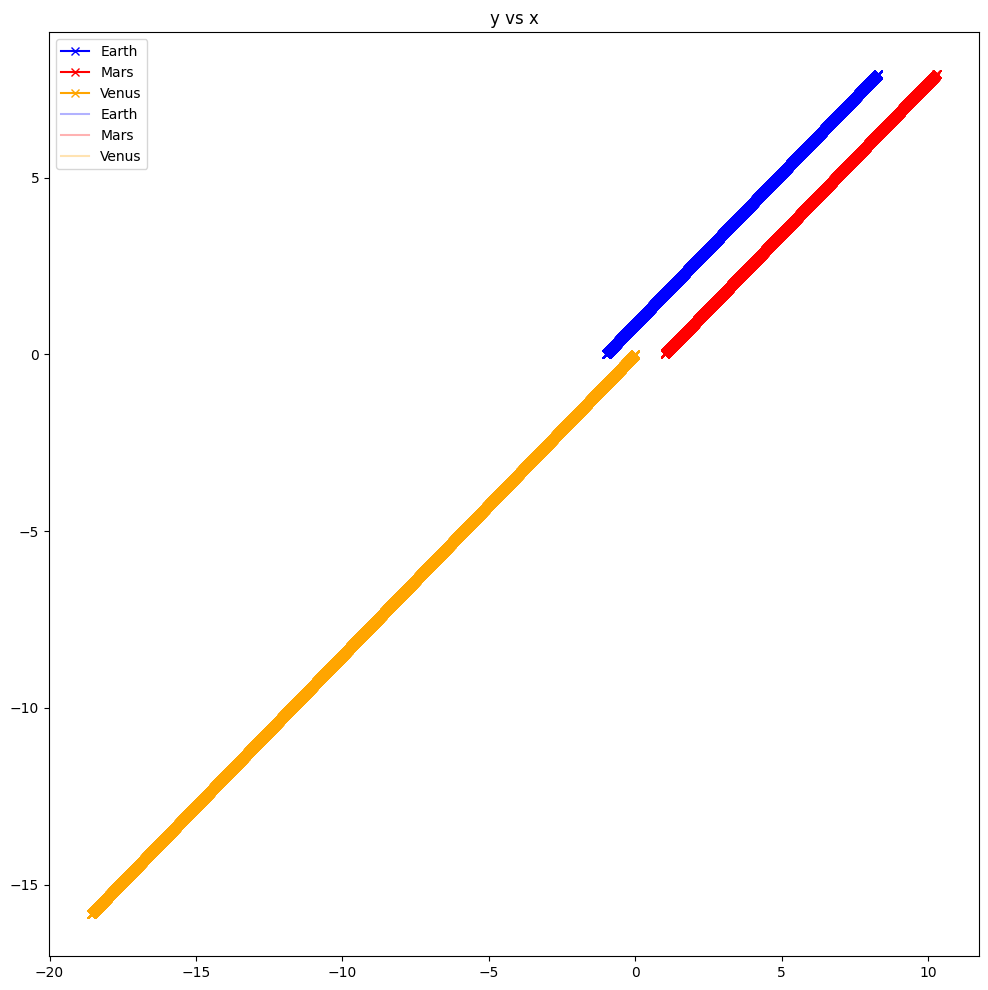

In [3]:
p = np.array([-1, 1, 0, 0, 0, 0, 0.464445, 0.464445, -0.92889, 0.39606, 0.39606, -0.79212])
d = heun(p, 20000, 0.001)
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("y vs x")
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', marker='x', label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', marker='x',label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', marker='x', label='Venus')
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', alpha=0.3, label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', alpha=0.3, label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', alpha=0.3, label='Venus')
ax.legend()
plt.show()